In [39]:
# Загрузка библиотек

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt
import matplotlib.image as img

%matplotlib inline

import seaborn as sns

## Функции

In [46]:
def visual_dep(df, var_name, levels=None): 
    fig, axes = plt.subplots(3, 1, figsize=(10, 20))
    
    df_group_var = df[['Exposure', 'PolicyCount','ClaimAmount', 'ClaimCount']].groupby(df[var_name]).sum()
    df_group_var = df_group_var.reset_index()

    df_group_var['Freq'] = df_group_var.ClaimCount / df_group_var.Exposure
    df_group_var['AvgClaim'] = df_group_var.ClaimAmount / df_group_var.ClaimCount 
    
    if levels:
        x=levels
    else:
        x=df_group_var[var_name]
        
    sns.barplot(x=x, y=df_group_var['PolicyCount'], ax=axes[0])        
    sns.barplot(x=x, y=df_group_var['Freq'], ax=axes[1])
    sns.barplot(x=x, y=df_group_var['AvgClaim'], ax=axes[2])  
        
    fig.suptitle(f'Признак: {var_name}', fontsize=18)
    axes[0].set_title(f'Распределение числа полисов по {var_name}', fontsize=18)
    axes[0].set_xlabel('')
    axes[1].set_title(f'Процент убытков от {var_name}', fontsize=18)
    axes[1].set_xlabel('')
    axes[2].set_title(f'Средний убыток от {var_name}', fontsize=18)
    axes[2].set_xlabel('')
    print('\n')
    plt.show()

## Загрузка данных

In [3]:
df = pd.read_csv('freMPL-R.csv', low_memory=False)

In [4]:
# Объединяем наборы данных 5-9, удаляем пустые столбцы, удаляем дубликаты

df59 = df.loc[df.Dataset.isin([5, 6, 7, 8, 9])]
df59 = df59.drop(['Dataset'], axis=1)
df59 = df59.dropna(axis=1, how='all')
print('With duplicates\t\t', len(df59))
df59 = df59.drop_duplicates()
print('Without duplicates\t', len(df59))

With duplicates		 165200
Without duplicates	 115155


In [5]:
df59.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115155 entries, 145780 to 310979
Data columns (total 20 columns):
Exposure             115155 non-null float64
LicAge               115155 non-null int64
RecordBeg            115155 non-null object
RecordEnd            59455 non-null object
Gender               115155 non-null object
MariStat             115155 non-null object
SocioCateg           115155 non-null object
VehUsage             115155 non-null object
DrivAge              115155 non-null int64
HasKmLimit           115155 non-null int64
BonusMalus           115155 non-null int64
ClaimAmount          115155 non-null float64
ClaimInd             115155 non-null int64
ClaimNbResp          115155 non-null float64
ClaimNbNonResp       115155 non-null float64
ClaimNbParking       115155 non-null float64
ClaimNbFireTheft     115155 non-null float64
ClaimNbWindscreen    115155 non-null float64
OutUseNb             115155 non-null float64
RiskArea             115155 non-null float64
d

## Описание датасета

    Exposure - выраженный в годах срок действия договора страхования в отчетном периоде (0.001 - 1)
    LicAge - водительский стаж
    RecordBeg - дата начала действия страхового договора - текущий год
    RecordEnd - дата окончания действия страхового договора в текущем году
    Gender - пол водителя
    MariStat - семейное положение
    SocioCateg - социальная категория
    VehUsage - использование транспортного средства (в частных целях, в частных целях плюс поездки до офиса, профессиональное использование, профессиональные перевозки)
    DrivAge - возраст водителя
    HasKmLimit - наличие/отстутсвие лимита по киллометражу
    BonusMalus - бонусные баллы от 50 до 272
    ClaimAmount - сумма страховго возмещения
    RiskVar - оценка риска по 20-балльной шкале
    ClaimInd - наличие/ отсутствие страховых случаев
    ClaimNbResp - оценка ClaimNbResp по 5-балльной шкале (0-5)
    ClaimNbNonResp - оценка ClaimNbNonResp по 7-балльной шкале (0-7)
    ClaimNbParking - оценка ClaimNbParking (парковка) по 5-балльной шкале (0-5)
    ClaimNbFireTheft оценка ClaimNbFireTheft (пожар, воровство) по 4-балльной шкале (0-4)
    ClaimNbWindscreen оценка ClaimNbWindscreen (ветровое стекло) по 8-балльной шкале (0-8)
    OutUseNb оценка OutUseNb по 5-балльной шкале (0-5)
    RiskArea - оценка RiskArea по 13-балльной шкале (1-13)

In [6]:
df = df59

In [7]:
# Вспомогательный столбец для суммирования числа полисов

df['PolicyCount'] = 1

In [8]:
# Вспомогательный столбец для суммирования числа полисов с убытками

df['ClaimCount'] = df['ClaimAmount'] > 0

In [9]:
# Вспомогательный столбец для суммирования числа полисов без убытков

df['NoClaimCount'] = df.PolicyCount - df.ClaimCount

In [10]:
df.columns

Index(['Exposure', 'LicAge', 'RecordBeg', 'RecordEnd', 'Gender', 'MariStat',
       'SocioCateg', 'VehUsage', 'DrivAge', 'HasKmLimit', 'BonusMalus',
       'ClaimAmount', 'ClaimInd', 'ClaimNbResp', 'ClaimNbNonResp',
       'ClaimNbParking', 'ClaimNbFireTheft', 'ClaimNbWindscreen', 'OutUseNb',
       'RiskArea', 'PolicyCount', 'ClaimCount', 'NoClaimCount'],
      dtype='object')

In [23]:
df.head(2)

,Exposure,LicAge,RecordBeg,RecordEnd,Gender,MariStat,SocioCateg,VehUsage,DrivAge,HasKmLimit,...,ClaimNbResp,ClaimNbNonResp,ClaimNbParking,ClaimNbFireTheft,ClaimNbWindscreen,OutUseNb,RiskArea,PolicyCount,ClaimCount,NoClaimCount
145780,0.083,332,2004-01-01,2004-02-01,Male,Other,CSP50,Professional,46,0,...,0.0,1.0,0.0,0.0,0.0,0.0,9.0,1,False,1
145781,0.916,333,2004-02-01,NaN,Male,Other,CSP50,Professional,46,0,...,0.0,1.0,0.0,0.0,0.0,0.0,9.0,1,False,1


## Анализ данных

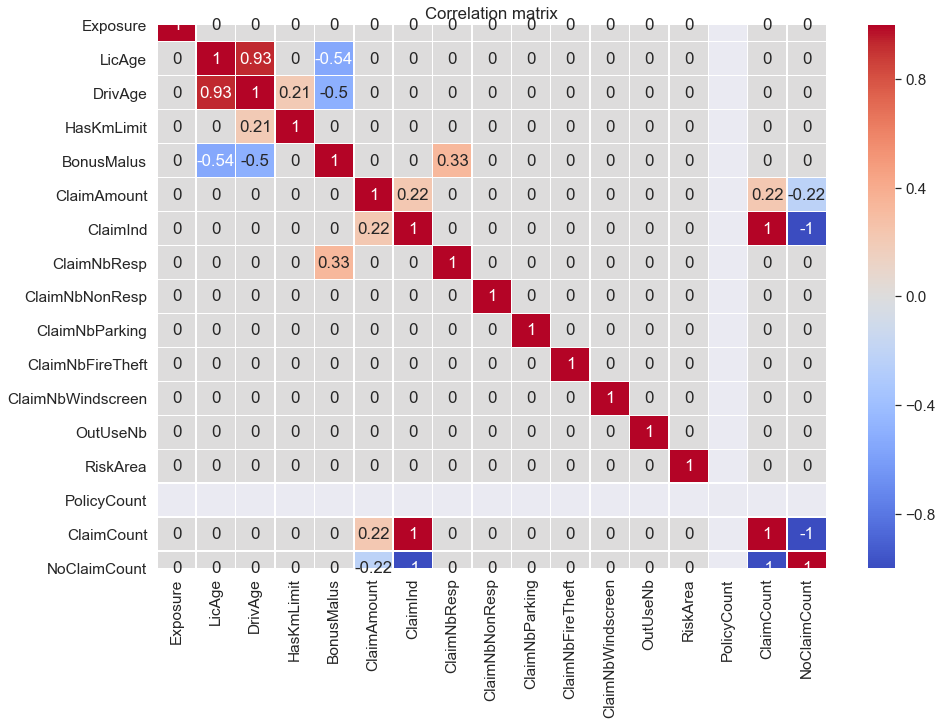

In [15]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.2] = 0  # Проверьте, что будет если убрать маленькие корреляции

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [19]:
num_f_names = list(df.select_dtypes(include=[np.number]).columns)
num_f_names

['Exposure',
 'LicAge',
 'DrivAge',
 'HasKmLimit',
 'BonusMalus',
 'ClaimAmount',
 'ClaimInd',
 'ClaimNbResp',
 'ClaimNbNonResp',
 'ClaimNbParking',
 'ClaimNbFireTheft',
 'ClaimNbWindscreen',
 'OutUseNb',
 'RiskArea',
 'PolicyCount',
 'NoClaimCount']

In [27]:
discr_f_names = []
for elem in list(df.columns):
    v_c = len(df[elem].value_counts())
    print(f'Колонка {elem} имеет {v_c} значений')
    if v_c <= 20:
        discr_f_names.append(elem)

discr_f_names

Колонка Exposure имеет 761 значений
Колонка LicAge имеет 844 значений
Колонка RecordBeg имеет 366 значений
Колонка RecordEnd имеет 365 значений
Колонка Gender имеет 2 значений
Колонка MariStat имеет 2 значений
Колонка SocioCateg имеет 46 значений
Колонка VehUsage имеет 4 значений
Колонка DrivAge имеет 80 значений
Колонка HasKmLimit имеет 2 значений
Колонка BonusMalus имеет 104 значений
Колонка ClaimAmount имеет 9588 значений
Колонка ClaimInd имеет 2 значений
Колонка ClaimNbResp имеет 6 значений
Колонка ClaimNbNonResp имеет 8 значений
Колонка ClaimNbParking имеет 6 значений
Колонка ClaimNbFireTheft имеет 5 значений
Колонка ClaimNbWindscreen имеет 8 значений
Колонка OutUseNb имеет 6 значений
Колонка RiskArea имеет 13 значений
Колонка PolicyCount имеет 1 значений
Колонка ClaimCount имеет 2 значений
Колонка NoClaimCount имеет 2 значений


['Gender',
 'MariStat',
 'VehUsage',
 'HasKmLimit',
 'ClaimInd',
 'ClaimNbResp',
 'ClaimNbNonResp',
 'ClaimNbParking',
 'ClaimNbFireTheft',
 'ClaimNbWindscreen',
 'OutUseNb',
 'RiskArea',
 'PolicyCount',
 'ClaimCount',
 'NoClaimCount']

In [50]:
cat_f_names = list(df.select_dtypes(include=[np.object]).columns)
cat_f_names

['RecordBeg', 'RecordEnd', 'Gender', 'MariStat', 'SocioCateg', 'VehUsage']

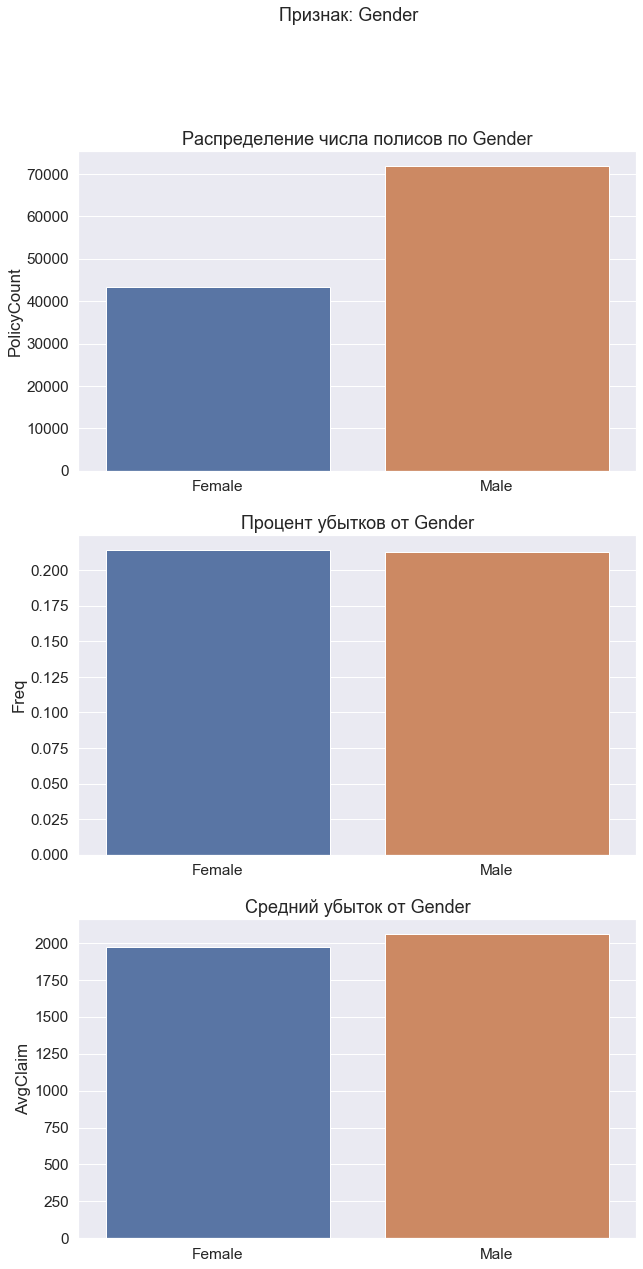

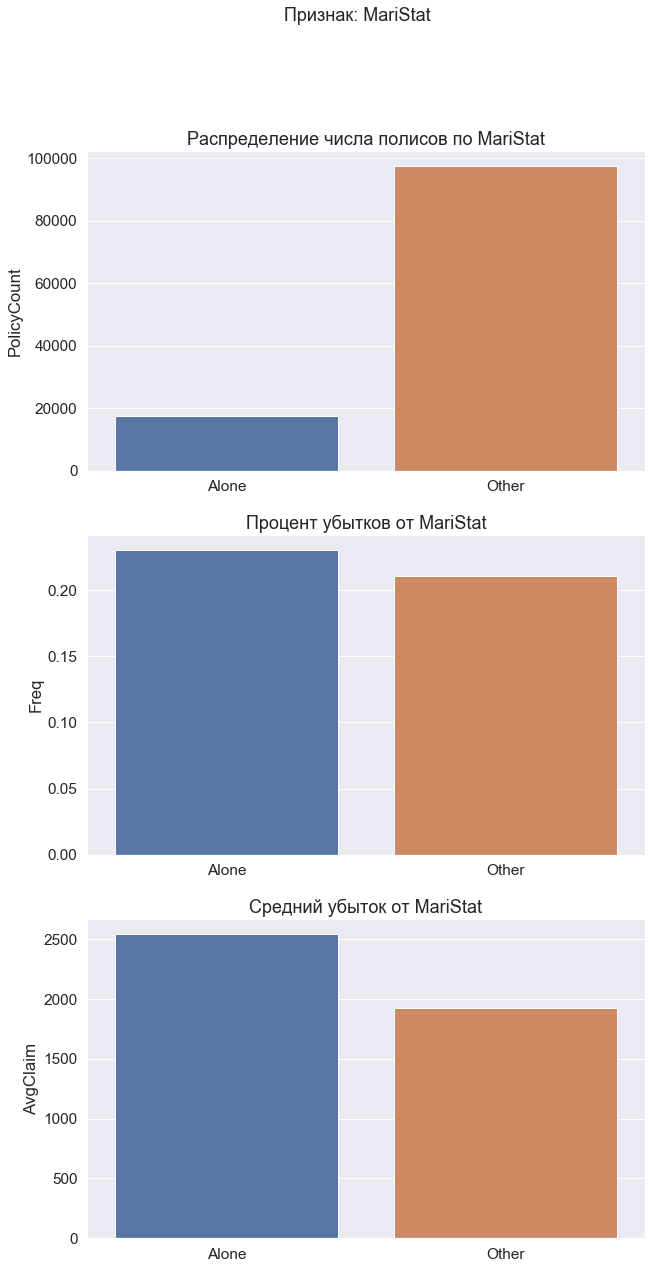

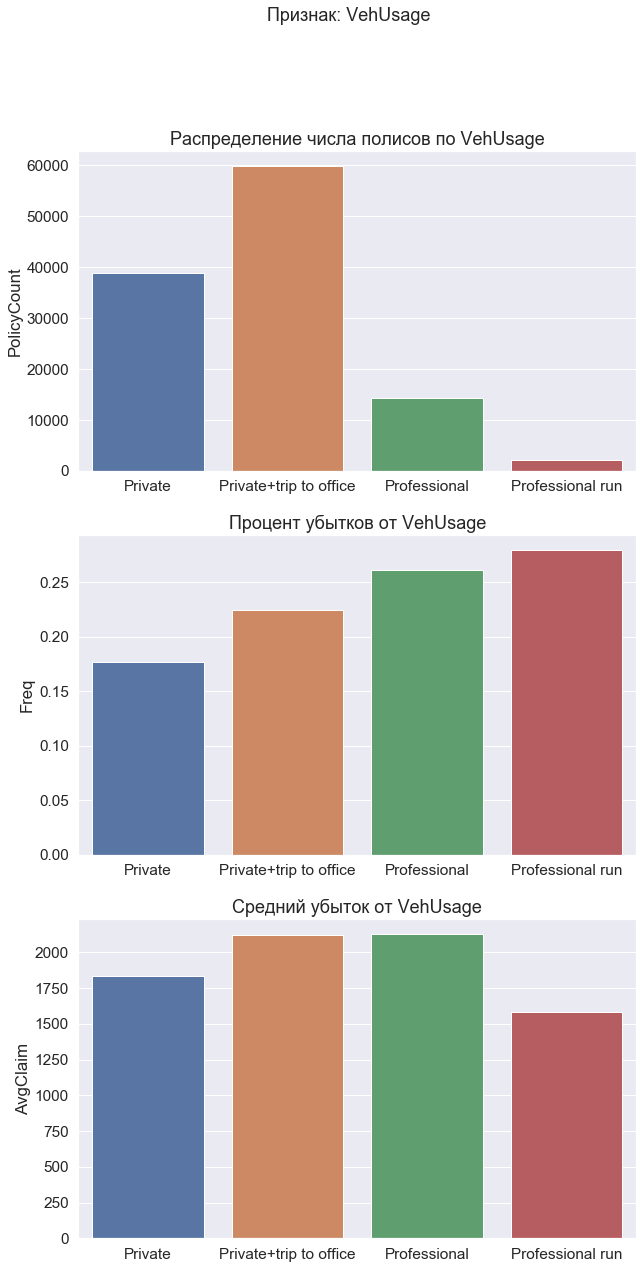

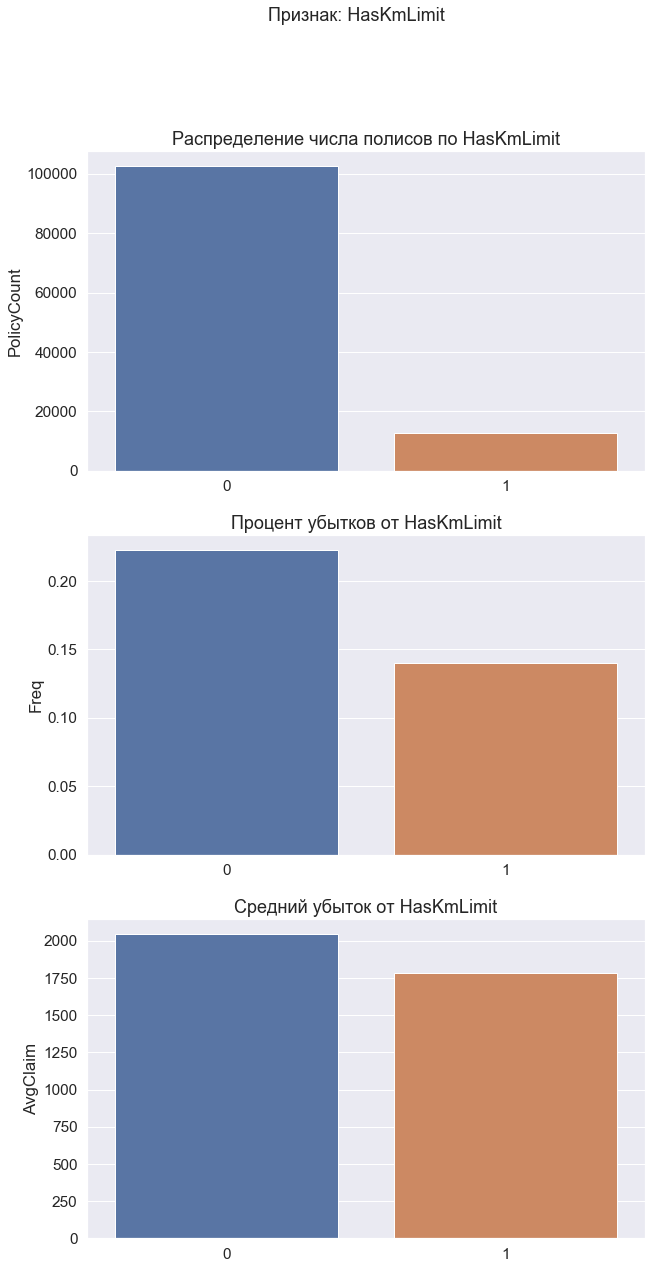

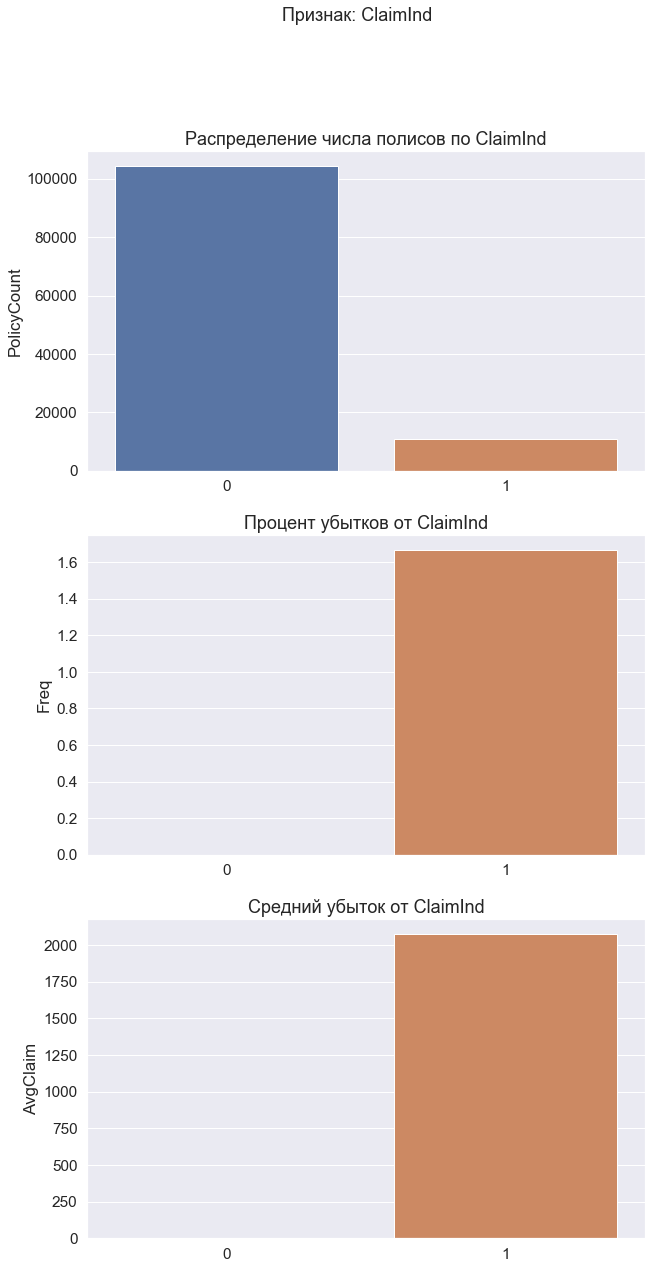

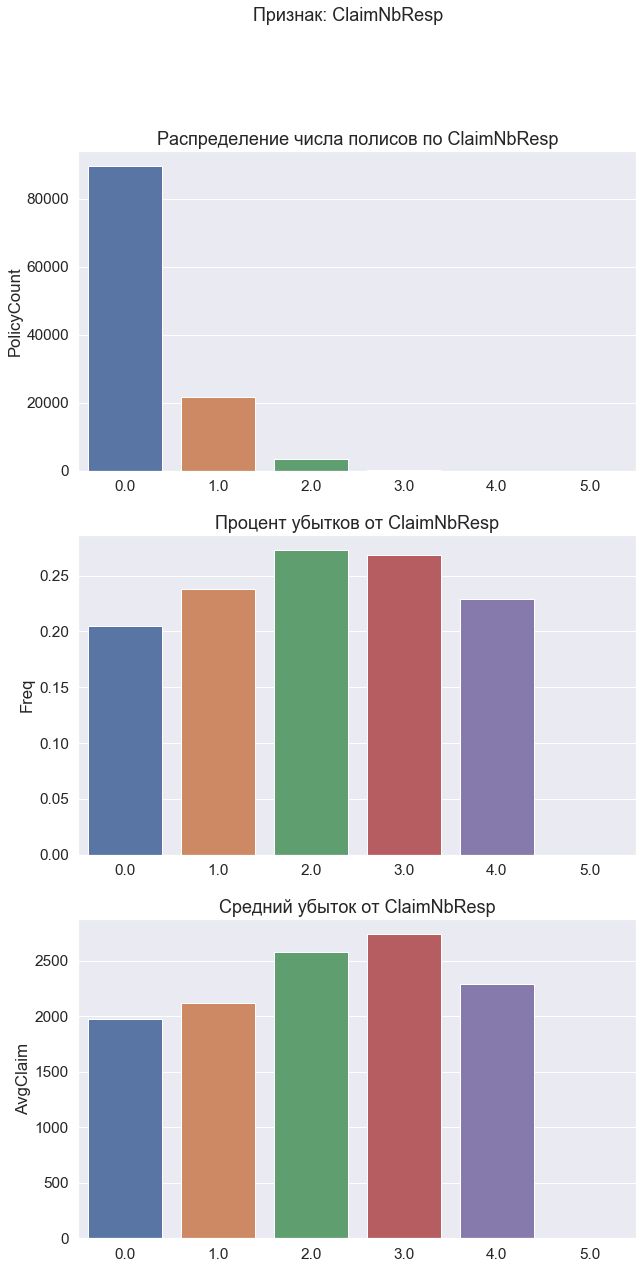

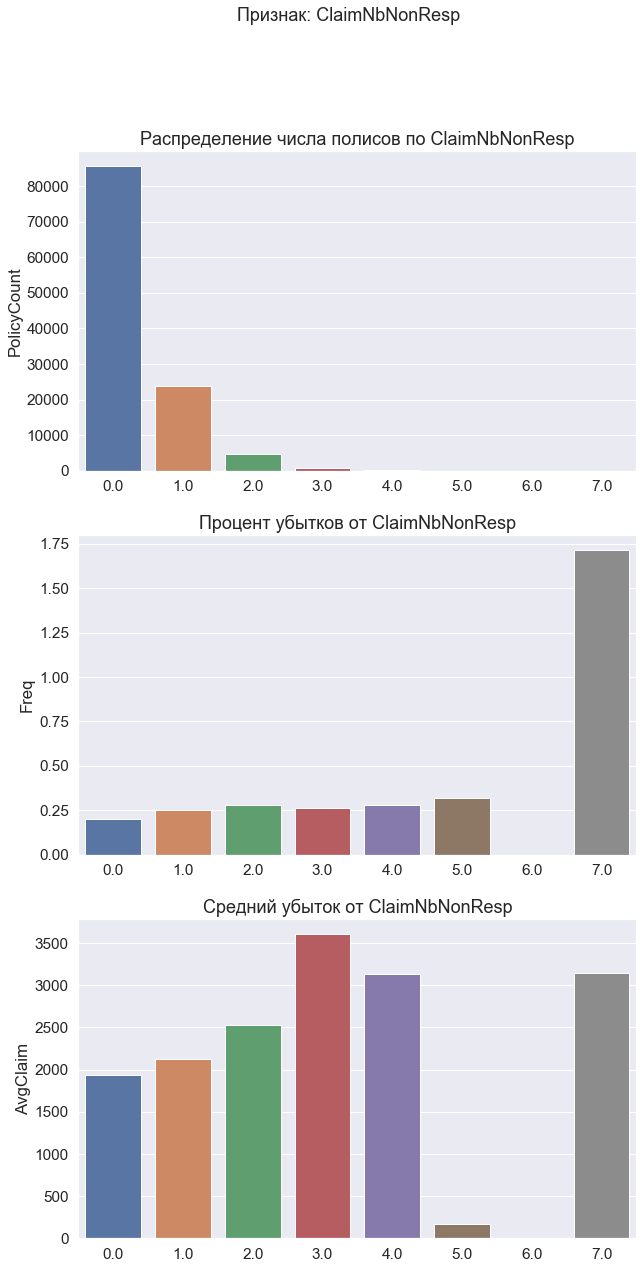

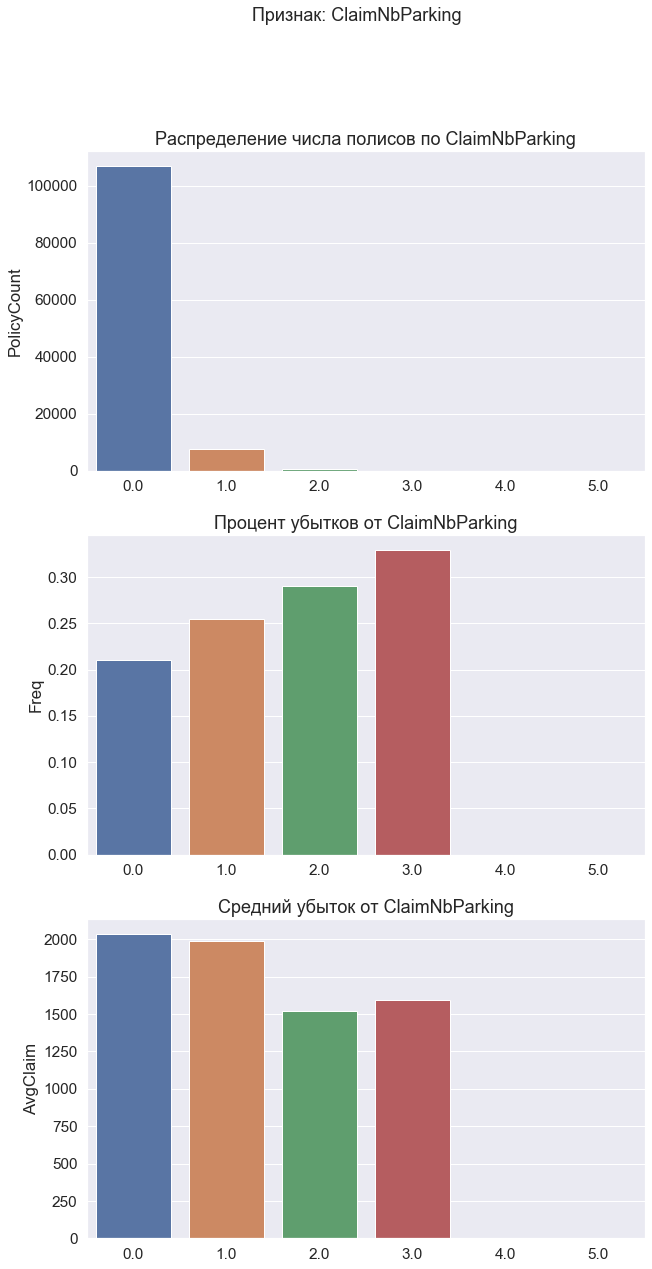

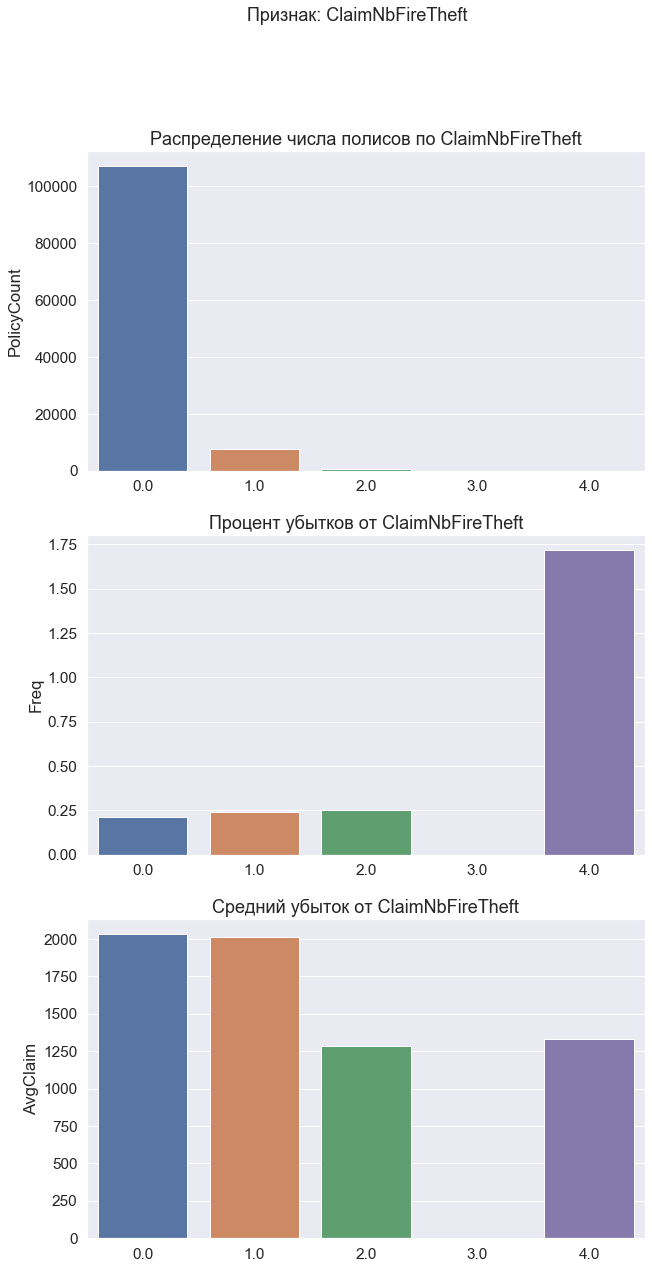

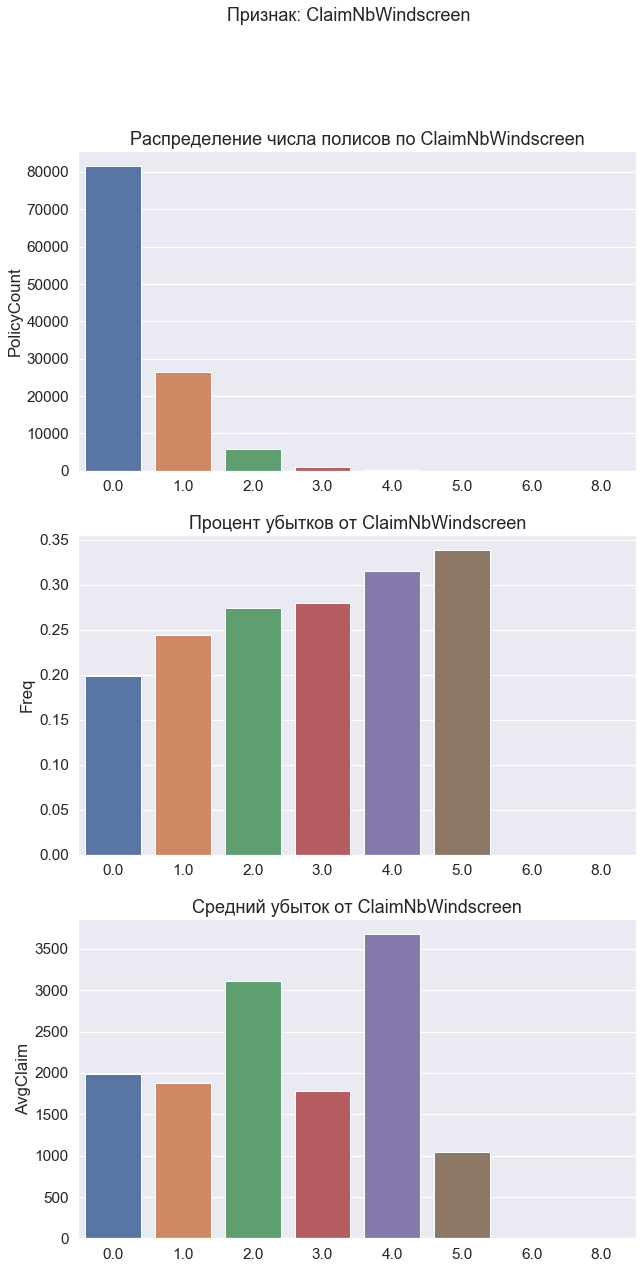

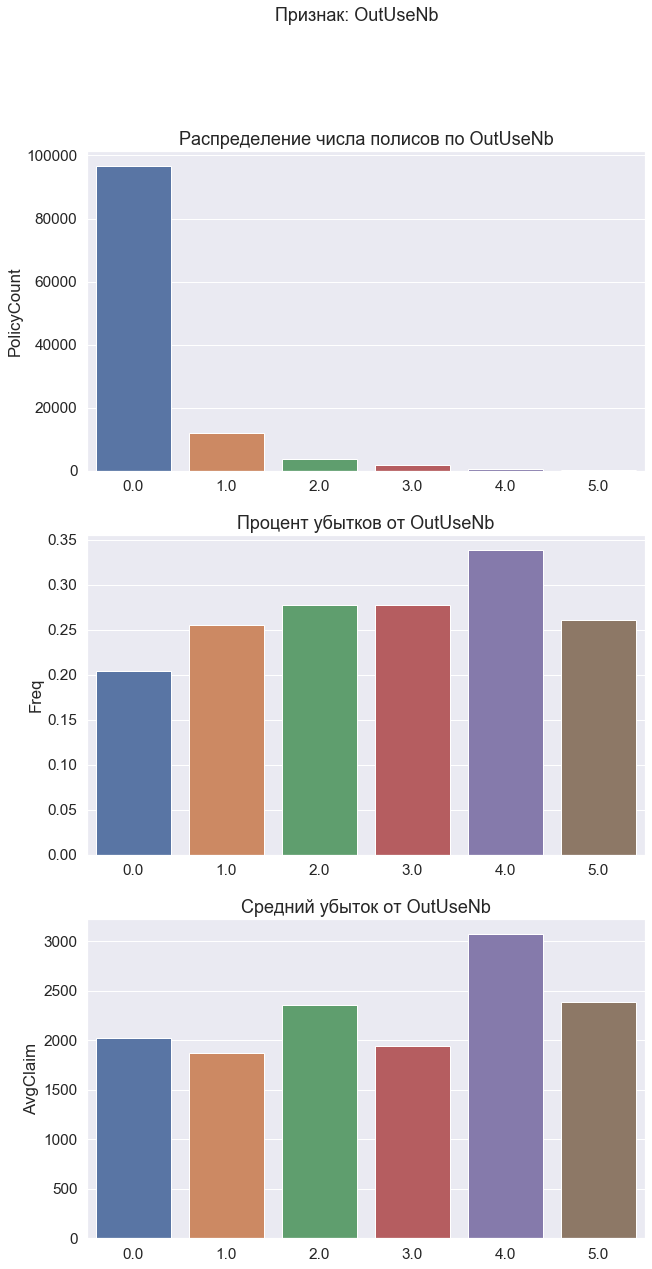

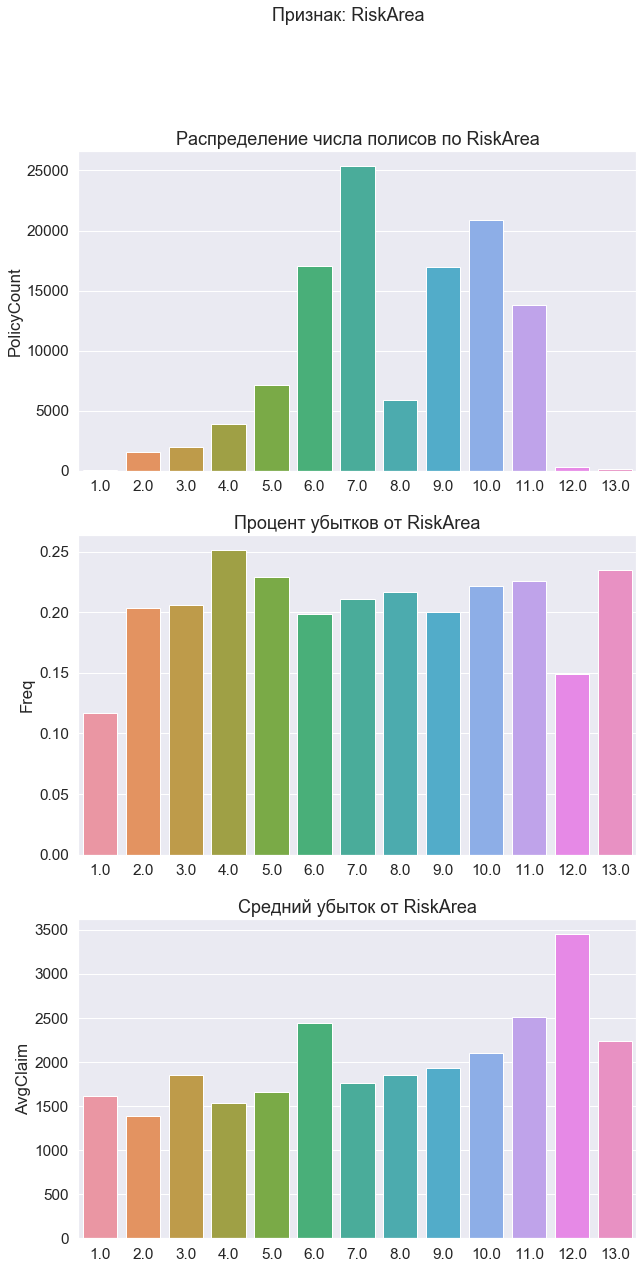

In [48]:
for f in discr_f_names[:-3]:
    visual_dep(df,f)

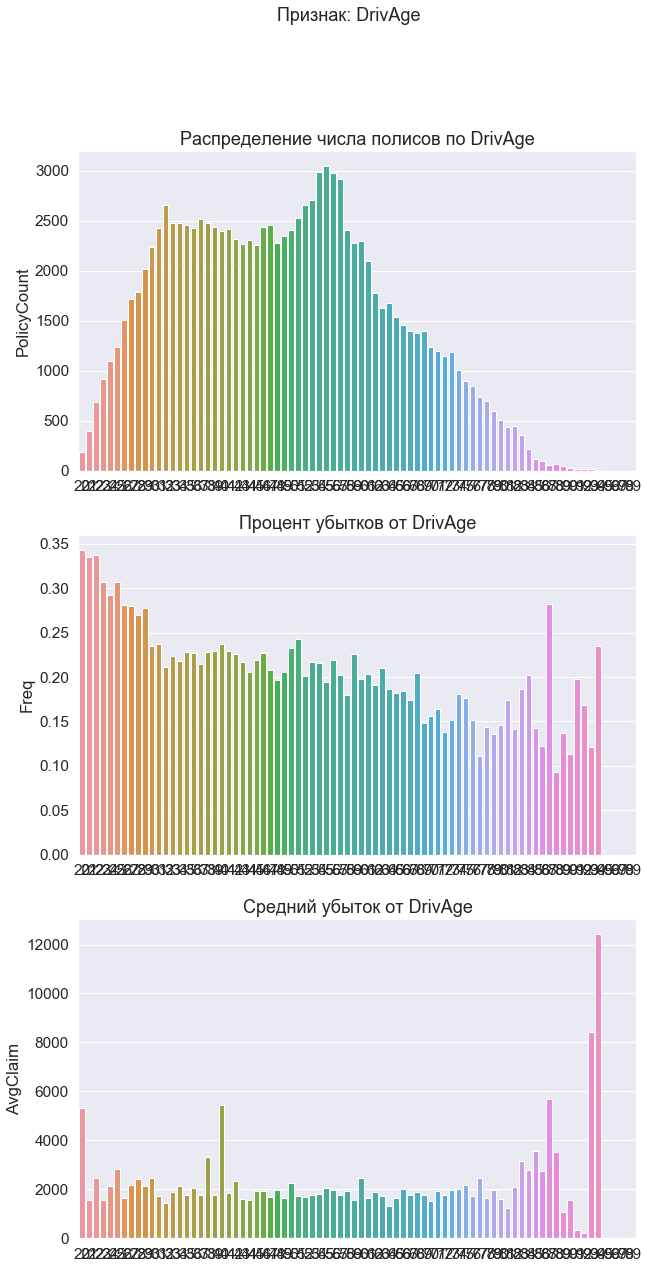

In [52]:
visual_dep(df,'DrivAge')

## Выводы
     1. Есть линейная связь между возрастом водителя и коэффициентом скидки
     2. Процент случае с убытками больше у Proffessionl ran, но он в среднем меньше.
     3. У тех у кого нет ограничений по км - всё хуже.
     4. Есть много показателей в которых ничего не понятно, но ClaimNbResp 2.0 и 3.0 более рисковый. ClaimNbNonResp 3.0 убыточен, как и 5.0 и 7.0, но 7.0 ещё и очень частый
     5. По ClaimNBParking выоды делать сложно, так как кроме 1.0 мало полисов.
     6. По NbFireTheft тоже.
     __ Важно пояснить, что выводов можно наделать много, только не ясно зачем. 